In [2]:
# importing libiray
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation

In [3]:
# reading the datasets (training - testing - validation)
train_df = pd.read_csv(r"E:/كلية/4th cs/Secound Term/Nural Network/Project/dataset/train.csv")
test_df = pd.read_csv(r"E:/كلية/4th cs/Secound Term/Nural Network/Project/dataset/test.csv")
val_df = pd.read_csv(r"E:/كلية/4th cs/Secound Term/Nural Network/Project/dataset/val.csv")
# train_df.head()
train_df.shape

(20000, 2)

In [7]:
# normalization (Data Preprocessing)
def cleanText(text):
    text = text.lower()
    text = re.sub('[^\w\s]','',text)
    
    #Remove spaces at the beginning and at the end of the string
    text.strip()
    
    txt=[]
    for w in text.split():
        stemWord = porter.stem(w)
        txt.append(stemWord)
    txt = ' '.join(txt)
    return txt

In [4]:
# Combine data from the three CSV files into a single DataFrame
pre = pd.DataFrame()
pre['text'] = pd.concat([train_df['document'], val_df['document'], test_df['document']], ignore_index=True)
pre['summary'] = pd.concat([train_df['summary'], val_df['summary'], test_df['summary']], ignore_index=True)
pre.head()

,text,summary
0,jason blake of the islanders will miss the res...,blake missing rest of season
1,the u.s. military on wednesday captured a wife...,u.s. arrests wife and daughter of saddam deput...
2,craig bellamy 's future at west ham appeared i...,west ham drops bellamy amid transfer turmoil
3,cambridge - when barack obama sought advice be...,in search for expertise harvard looms large
4,"wall street held on to steep gains on monday ,...",wall street ends a three-day losing streak


In [12]:
pre['text'] = pre['text'].apply(cleanText)
pre['summary'] = pre['summary'].apply(cleanText)

In [13]:
pre.shape
# pre.head()

(22000, 2)

In [14]:
#check for null values
pre.isnull().sum()

text       0
summary    0
dtype: int64

In [15]:
# Check on the most number of word in text
# Check how much % of text have 0-70 words
cnt = 0
for i in pre['text']:
    if len(i.split()) <= 70:
        cnt = cnt + 1
print(cnt / len(pre['text']))

1.0


In [5]:
# Check how much % of text have 0-20 words
cnt = 0
for i in pre['summary']:
    if len(i.split()) <= 20:
        cnt = cnt + 1
print(cnt / len(pre['summary']))

0.9995909090909091


In [16]:
# Model to summarize the text between 0-20 words for Summary and 0-70 words for Text
max_text_len = 70
max_summary_len = 20

In [17]:
# Select the Summaries and Text which fall below max length 

import numpy as np

cleaned_text = np.array(pre['text'])
cleaned_summary = np.array(pre['summary'])

short_text = []
short_summary = []

for i in range(len(train_df)):
    if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_text[i].split()) <= max_text_len:
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre = pd.DataFrame({'text': short_text,'summary': short_summary})

post_pre.head(2)

,text,summary
0,jason blake of the island will miss the rest o...,blake miss rest of season
1,the us militari on wednesday captur a wife and...,us arrest wife and daughter of saddam deputi t...


In [19]:
# Add sostok(start of the sequence) and eostok(end of the sequence)

post_pre['summary'] = post_pre['summary'].apply(lambda x: 'sostok ' + x \
        + ' eostok')

post_pre.head(2)

,text,summary
0,jason blake of the island will miss the rest o...,sostok blake miss rest of season eostok
1,the us militari on wednesday captur a wife and...,sostok us arrest wife and daughter of saddam d...


In [20]:
# split the data into train and test data chunks.

from sklearn.model_selection import train_test_split

x_train ,x_test, y_train, y_test = train_test_split(
    np.array(post_pre["text"]),
    np.array(post_pre["summary"]),
    test_size=0.1,
    random_state=0,
    shuffle=True,
)

In [22]:
# Tokenize the text to get the vocab count 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_train))

print(x_tokenizer.word_index)

{'the': 1, 'a': 2, 'of': 3, 'to': 4, 'in': 5, 'and': 6, 'on': 7, 's': 8, 'for': 9, 'said': 10, 'it': 11, 'that': 12, 'with': 13, 'at': 14, 'an': 15, 'as': 16, 'by': 17, 'from': 18, 'tuesday': 19, 'ha': 20, 'hi': 21, 'wednesday': 22, 'thursday': 23, 'us': 24, 'monday': 25, 'wa': 26, 'unk': 27, 'is': 28, 'friday': 29, 'presid': 30, 'lrb': 31, 'rrb': 32, 'after': 33, 'offici': 34, 'year': 35, 'new': 36, 'will': 37, 'govern': 38, 'be': 39, 'state': 40, 'have': 41, 'their': 42, 'report': 43, 'two': 44, 'minist': 45, 'over': 46, 'nation': 47, 'countri': 48, 'world': 49, 'china': 50, 'sunday': 51, 'who': 52, 'he': 53, 'saturday': 54, 'first': 55, 'were': 56, 'here': 57, 'against': 58, 'thi': 59, 'peopl': 60, 'unit': 61, 'are': 62, 'kill': 63, 'more': 64, 'percent': 65, 'polic': 66, 'up': 67, 'million': 68, 'into': 69, 'one': 70, 'leader': 71, 'dollar': 72, 'week': 73, 'day': 74, 'been': 75, 'last': 76, 'not': 77, 'citi': 78, 'month': 79, 'intern': 80, 'had': 81, 'but': 82, 'group': 83, 'than'

In [23]:
# print(x_tokenizer.word_index)
x_tokenizer.word_counts.items()

odict_items([('the', 28632), ('second', 422), ('round', 206), ('climat', 58), ('meet', 413), ('of', 14935), ('major', 379), ('economi', 275), ('will', 1655), ('be', 1395), ('conclud', 47), ('with', 3215), ('a', 15583), ('chairman', 156), ('s', 7190), ('summari', 3), ('an', 2797), ('offici', 1692), ('attend', 85), ('told', 161), ('xinhua', 81), ('on', 7875), ('thursday', 2134), ('tivo', 2), ('inc', 165), ('and', 9165), ('nero', 1), ('ag', 57), ('germani', 205), ('were', 1026), ('set', 379), ('to', 13707), ('announc', 553), ('monday', 2035), ('that', 3514), ('they', 659), ('launch', 231), ('packag', 49), ('turn', 151), ('window', 30), ('pc', 7), ('into', 786), ('tv', 68), ('record', 263), ('just', 185), ('like', 207), ('settop', 1), ('box', 33), ('three', 622), ('us', 2132), ('soldier', 239), ('injur', 240), ('tuesday', 2244), ('when', 529), ('their', 1304), ('militari', 529), ('vehicl', 83), ('roll', 45), ('over', 1203), ('while', 297), ('patrol', 38), ('in', 12800), ('southeast', 76), 

In [24]:

#Find the percentage of occurrence of rare words (say, occurring less than 5 times) in the text.

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < 5:
        cnt = cnt + 1
    
print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

% of rare words in vocabulary:  70.7153189305212


In [25]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_train))

# Convert text sequences to integer sequences 
x_train_seq = x_tokenizer.texts_to_sequences(x_train) 
x_test_seq = x_tokenizer.texts_to_sequences(x_test)

# Pad zero upto maximum length
x_train = pad_sequences(x_train_seq,  maxlen=max_text_len, padding='post')
x_test = pad_sequences(x_test_seq, maxlen=max_text_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 6277


In [26]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_train))

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < 5:
        cnt = cnt + 1
    
print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_train))

# Convert text sequences to integer sequences 
y_train_seq = y_tokenizer.texts_to_sequences(y_train) 
y_test_seq = y_tokenizer.texts_to_sequences(y_test) 

# Pad zero upto maximum length
y_train = pad_sequences(y_train_seq, maxlen=max_summary_len, padding='post')
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 71.4763185782995
Size of vocabulary in Y = 3500


In [27]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 70)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 70, 200)      1255400     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 70, 300),    601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [29]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [30]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [36]:
history = model.fit(
    [x_train, y_train[:, :-1]],
    y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:, 1:],
    epochs=5,
    callbacks=[es],
    batch_size=128,
    validation_data=([x_test, y_test[:, :-1]],y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:, 1:]),
    )

Epoch 1/5
141/141 [==============================] - 915s 6s/step - loss: 2.7360 - val_loss: 2.6615
Epoch 2/5
141/141 [==============================] - 964s 7s/step - loss: 2.6678 - val_loss: 2.6233
Epoch 3/5
141/141 [==============================] - 1033s 7s/step - loss: 2.6235 - val_loss: 2.5867
Epoch 4/5
141/141 [==============================] - 1019s 7s/step - loss: 2.5763 - val_loss: 2.5515
Epoch 5/5
141/141 [==============================] - 1032s 7s/step - loss: 2.5317 - val_loss: 2.5225


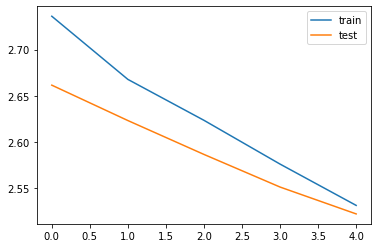

In [37]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [38]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [39]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [40]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [41]:
# seq2summary() and seq2text() which convert numeric-representation to string-representation of summary and text respectively.
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [42]:
for i in range(0, 19):
    print ('Review:', seq2text(x_train[i]))
    print ('Original summary:', seq2summary(y_train[i]))
    print ('Predicted summary:', decode_sequence(x_train[i].reshape(1,max_text_len)))
    print ('\n')

Review: the second round climat meet of major economi will be conclud with a chairman s an offici attend the meet told xinhua on thursday 
Original summary: climat chang meet to be conclud with chairman summari 
Predicted summary:  us stock close percent higher


Review: inc and ag of germani were set to announc monday that they will be launch a packag that turn a window pc into a tv record just like a box 
Original summary: new softwar turn pc into tv record 
Predicted summary:  us stock close percent higher


Review: three us soldier were injur tuesday when their militari vehicl roll over while on patrol in southeast afghanistan the us militari said 
Original summary: three us soldier injur in afghan car accid 
Predicted summary:  us stock close percent higher


Review: south korea will send an envoy to china thi week to seek support for it campaign for the un secur council to north korea over the sink of a warship offici said monday 
Original summary: s korea to send envoy to china 